<a href="https://colab.research.google.com/github/saeedrajaee/Saeed/blob/master/deepLearningWithCNN_LAOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip /content/gdrive/MyDrive/PythonProgramming/imageClasses1.zip -d /content/CNN_Multiclass_Classification_Final/2750


'\n# unzip the zip file and its contents should now be in /darknet/data/obj\n!unzip /content/gdrive/MyDrive/PythonProgramming/imageClasses1.zip -d /content/CNN_Multiclass_Classification_Final/2750\n'

In [ ]:
!rm -rf /content/testing

In [ ]:
%cd /content/CNN_Multiclass_Classification_Final

/content/CNN_Multiclass_Classification_Final


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.applications import ResNetRS50
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import random
import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd CNN_Multiclass_Classification_Final

[Errno 2] No such file or directory: 'CNN_Multiclass_Classification_Final'
/content/CNN_Multiclass_Classification_Final


In [ ]:
ROOT_dir = "./2750/"
ROOT_dir

'./2750/'

In [ ]:
folders = os.listdir(ROOT_dir)
folders

['desert',
 'port',
 'river',
 'bareLand',
 'parking',
 'snow_mountain',
 'container',
 'dense-forest',
 'residential',
 'mountain',
 'agriculture',
 'sparse-forest',
 'industrial',
 'sparse-residential',
 'pool-pond']

In [ ]:
len_of_images = []
for i in folders:
    file_path = os.listdir("{}/{}".format(ROOT_dir,i))
    len_of_images.append(len(file_path))
   # print(f"{i}:{len(file_path)} files")

In [ ]:
sum(len_of_images)

13278

In [ ]:
file_path = os.listdir("{}/{}".format(ROOT_dir,"agriculture"))
#file_path

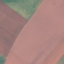

In [ ]:
Image.open(ROOT_dir+"agriculture/"+file_path[1])

In [ ]:
Image.open(ROOT_dir+"agriculture/"+file_path[90]).size

(64, 64)

In [ ]:
TRAIN_DIR = './training'
TEST_DIR = './testing'
BATCH_SIZE = 256
NUM_CLASSES=len(folders)
INPUT_SHAPE = (128,128, 3)
CLASS_MODE = 'categorical'

In [ ]:
for path in [TRAIN_DIR,TEST_DIR]:
    if not os.path.exists(path):
        os.mkdir(path)

In [ ]:
for subfolder in folders:
    if not os.path.exists(os.path.join(TRAIN_DIR,subfolder)):
        os.mkdir(os.path.join(TRAIN_DIR,subfolder))

    if not os.path.exists(os.path.join(TEST_DIR, subfolder)):
        os.mkdir(os.path.join(TEST_DIR, subfolder))

In [ ]:
dataset = {}
for value_class in folders:
    for img in os.listdir(ROOT_dir+'/'+value_class):
        dataset.update({os.path.join(ROOT_dir,value_class,img):value_class})

In [ ]:
len(dataset)

13278

In [ ]:
sum(len_of_images)

13278

In [ ]:
X = pd.Series(dataset.keys())
y = pd.get_dummies(dataset.values())

In [ ]:
split = ShuffleSplit(n_splits=1,test_size=0.20,train_size=0.8,random_state=42)

In [ ]:
for tra,tes in split.split(X,y):
    print(tra)
    print(tes)
    print(len(tra))
    print(len(tes))
    break

[ 7191 11934 12116 ...  5390   860  7270]
[12475  7602  4659 ...  5749 11979  2662]
10622
2656


In [ ]:
#%cd /content/CNN_Multiclass_Classification_Final/CNN_Multiclass_Classification_Final/CNN_Multiclass_Classification_Final

In [ ]:
#!pwd 

In [ ]:
#!cd ..

In [ ]:
import re
import shutil
from tqdm import tqdm

for train_idx, test_idx in split.split(X, y):
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('./2750', './training', i) for i in train_paths]
    new_test_paths = [re.sub('./2750/', './testing/', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

moving training files..


100%|██████████| 10622/10622 [00:02<00:00, 4747.07it/s]


moving testing files..


100%|██████████| 2656/2656 [00:00<00:00, 4077.91it/s]


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.1,
  subset="training",
  seed=42,
  image_size=(128,128),
  batch_size=BATCH_SIZE)

Found 10622 files belonging to 15 classes.
Using 9560 files for training.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_DIR,
  seed=42,
  image_size=(128,128),
  batch_size=BATCH_SIZE)

Found 2656 files belonging to 15 classes.


In [ ]:
class_names = train_ds.class_names
class_num = len(class_names)

In [ ]:
class_num

15

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomZoom(.5, .2),
  #data_augmentation,

  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  tf.keras.layers.Dense(class_num, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(class_num,activation="softmax")
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,validation_data=test_ds,epochs=100)

In [ ]:
model.evaluate(test_ds)

11/11 [==============================] - 0s 37ms/step - loss: 0.3661 - accuracy: 0.8837


[0.36608409881591797, 0.8836596608161926]

In [ ]:
model.evaluate(train_ds)

38/38 [==============================] - 1s 39ms/step - loss: 0.2385 - accuracy: 0.9166


[0.23849526047706604, 0.916631817817688]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                  

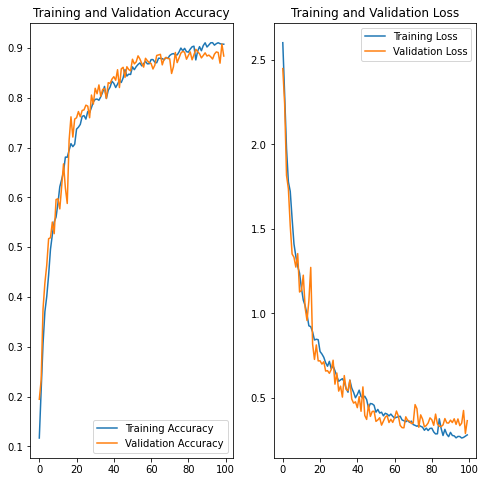

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#test = r'C:\Users\PC\Desktop\EuroSATallBands\ds\images\remote_sensing\otherDatasets\sentinel_2\2750\2750\Industrial\Industrial_4.jpg'
prediction = model.predict(test_ds)

11/11 [==============================] - 0s 40ms/step


In [ ]:
prediction[0].max()

0.99967515

In [ ]:
prediction[0]

array([9.9967515e-01, 1.5529487e-09, 5.3716924e-17, 9.4533787e-21,
       2.8969220e-07, 6.3770005e-07, 5.6522392e-10, 1.1605917e-13,
       1.2362853e-05, 3.3894878e-09, 6.3922094e-13, 3.1153994e-04,
       6.7680673e-15, 7.8633819e-23, 1.6826010e-12], dtype=float32)

0
0.99967515
2
0.9274354
2
0.9987503
10
0.54879475
8
0.9739034
8
0.5588705
12
0.9990546
12
0.9999995
8
0.9929629


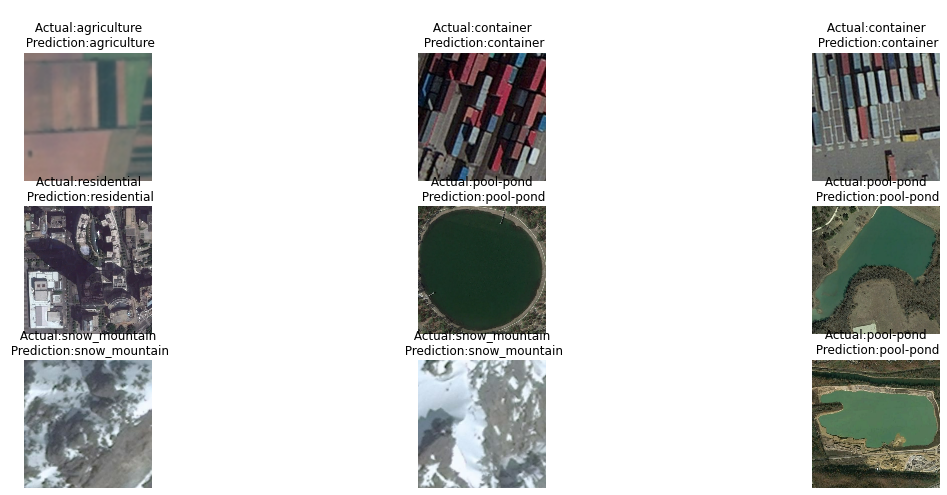

In [ ]:
plt.figure(figsize=(20,8))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"\n Actual:{class_names[labels[i]]} \n Prediction:{class_names[np.argmax(prediction[i])]}")
        plt.axis("off")
        print(np.argmax(prediction[i]))
        print(prediction[i].max())

In [ ]:
# To save model
model.save(r'/content/gdrive/MyDrive/PythonProgramming/CNN_Multiclass_Classification_Final.hdf5')

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import cv2
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model(r'/content/gdrive/MyDrive/PythonProgramming/CNN_Multiclass_Classification_Final.hdf5')

In [ ]:
model.summary()

In [ ]:
imageF = image.load_img(r'/content/CNN_Multiclass_Classification_Final/2750/dense-forest/mangrove(187).jpg', target_size=(128,128))

(-0.5, 127.5, 127.5, -0.5)

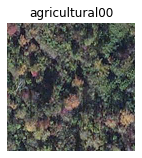

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.subplot(3,3,1+1)
plt.imshow(imageF)
plt.title(f"dense-forest")
plt.axis("off")

In [ ]:
img_array = image.img_to_array(imageF)

In [ ]:
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
print(np.shape(img_batch))

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(img_batch)

1/1 [==============================] - 0s 15ms/step


In [ ]:
print("Predicted Class: ", prediction)
print(prediction.max())
print(np.argmax(prediction))

Predicted Class:  [[4.76743775e-12 3.57785687e-13 3.25237423e-13 9.99849200e-01
  1.51502508e-11 1.02109625e-13 7.10306358e-06 1.98430234e-13
  9.70145209e-08 5.01472518e-12 1.11190893e-05 1.30119690e-04
  1.29981143e-17 1.51430231e-06 7.75259878e-07]]
0.9998492
3


In [ ]:
class_names[np.argmax(prediction)]

'dense-forest'

In [ ]:
class_names

['agriculture',
 'bareLand',
 'container',
 'dense-forest',
 'desert',
 'industrial',
 'mountain',
 'parking',
 'pool-pond',
 'port',
 'residential',
 'river',
 'snow_mountain',
 'sparse-forest',
 'sparse-residential']